In [1]:
# library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import json
import os


In [23]:
with open("dataset/qgts_train.json", "r", encoding="utf-8") as f:
    documents = json.load(f)
    
df_doc = pd.DataFrame(documents)

In [24]:
df_doc.head()

,961c4349-8cf1-4ef1-89cc-24d20bb9d000_67878,4008ed78-e66e-4d89-9c3b-c79bd1cf6fc9_366,d5a95b09-e8ea-44dd-993d-347ed418e1f1_15138,3e66798a-b7fd-41b5-8bc0-33b3d7ce2aca_177487,f5f944d2-277a-481d-ab09-612890402ded_137489,da11c342-a2b4-442b-a95a-b2c26f78bf7a_194764,980c09bc-14a0-4832-ad0b-ac1a79ca51cd_55670,e655782b-869d-4d80-9513-fda43a2bbf84_54069,cc1235a9-a603-4891-8474-6cc0a860f159_84759,534caa94-be3a-4a61-b39e-5319f0f9425c_28551,...,cbd9045d-9abb-4103-9b45-64678a9b9262_185783,553912ab-4932-4d42-a047-b68aa507ee73_104362,1ed89f09-9d35-4668-8e05-7ffa10d0bd6c_206755,f73b0a9e-63c1-44cd-b36f-b41b696d4131_37581,46cddbe6-646c-4845-a699-7cdfe3b21721_65261,6f98ccbb-db6f-4646-ac1e-08d8d8bda71a_247103,345e8385-635c-44ab-abd1-f9fbcccaf774_159755,c38ac583-a824-46d9-ad00-105571c0c8fa_120087,3ed0fa3e-af7c-40b2-b44e-bf16de45051e_7772,7878104c-6dfa-42fe-badd-8fc53b2314ac_163896
total_relevant_docs,4,5,4,15,6,4,9,8,4,5,...,4,7,5,11,5,4,5,5,5,4
relevant_doc_ids,[{'doc_id': '135f5fdb-bcba-40b8-b90d-823617f1e...,[{'doc_id': 'ada9aadc-7371-450f-b610-9c1b40c8b...,[{'doc_id': 'ed189b8f-e6fe-42e3-b326-333b86d97...,[{'doc_id': 'a98df142-fd9e-4aad-a9c4-a334262e9...,[{'doc_id': '77294dfe-cbbb-4802-99ef-b86c2bd63...,[{'doc_id': '4016915f-5aee-4b97-94a0-02e998db6...,[{'doc_id': '0b4c1ceb-1a07-48d4-a555-f76e24058...,[{'doc_id': '124064f8-0dcf-4034-868d-2b16055ac...,[{'doc_id': '7bdf2f89-f3ab-4240-95d4-4616fe913...,[{'doc_id': '7b8283aa-a41e-41f9-bf7d-901ce326a...,...,[{'doc_id': '351d1ced-dc50-4e4f-90de-0d2684e64...,[{'doc_id': 'd770f2ef-2570-4b43-ae4b-75a99500d...,[{'doc_id': '28332c8d-5d96-4877-8429-d602a3735...,[{'doc_id': '6b4c155c-80d7-4203-9e62-e65f67aa2...,[{'doc_id': '99d38d5a-2d11-4ec2-b443-442e0d0eb...,[{'doc_id': '7ae6f7f5-b4ca-477a-b71e-8a8ae204c...,[{'doc_id': '142b4234-ce1b-4ba3-bc89-de7a57105...,[{'doc_id': 'f4dde969-74fc-4401-848d-ac1c906f7...,[{'doc_id': '43e3229a-7db0-423a-8557-10aabb32e...,[{'doc_id': '849eb92b-1401-430a-86ef-9fdfb09e2...
category,android,unix,android,tex,gaming,tex,tex,android,tex,android,...,tex,gaming,programmers,tex,android,programmers,tex,gaming,unix,gaming


In [25]:
df_doc.info()

<class 'pandas.DataFrame'>
Index: 3 entries, total_relevant_docs to category
Columns: 327 entries, 961c4349-8cf1-4ef1-89cc-24d20bb9d000_67878 to 7878104c-6dfa-42fe-badd-8fc53b2314ac_163896
dtypes: object(327)
memory usage: 7.7+ KB


In [26]:
print(df_doc.columns)

Index(['961c4349-8cf1-4ef1-89cc-24d20bb9d000_67878',
       '4008ed78-e66e-4d89-9c3b-c79bd1cf6fc9_366',
       'd5a95b09-e8ea-44dd-993d-347ed418e1f1_15138',
       '3e66798a-b7fd-41b5-8bc0-33b3d7ce2aca_177487',
       'f5f944d2-277a-481d-ab09-612890402ded_137489',
       'da11c342-a2b4-442b-a95a-b2c26f78bf7a_194764',
       '980c09bc-14a0-4832-ad0b-ac1a79ca51cd_55670',
       'e655782b-869d-4d80-9513-fda43a2bbf84_54069',
       'cc1235a9-a603-4891-8474-6cc0a860f159_84759',
       '534caa94-be3a-4a61-b39e-5319f0f9425c_28551',
       ...
       'cbd9045d-9abb-4103-9b45-64678a9b9262_185783',
       '553912ab-4932-4d42-a047-b68aa507ee73_104362',
       '1ed89f09-9d35-4668-8e05-7ffa10d0bd6c_206755',
       'f73b0a9e-63c1-44cd-b36f-b41b696d4131_37581',
       '46cddbe6-646c-4845-a699-7cdfe3b21721_65261',
       '6f98ccbb-db6f-4646-ac1e-08d8d8bda71a_247103',
       '345e8385-635c-44ab-abd1-f9fbcccaf774_159755',
       'c38ac583-a824-46d9-ad00-105571c0c8fa_120087',
       '3ed0fa3e-af7c-40b2-b

In [27]:
df_doc.isnull().sum()

961c4349-8cf1-4ef1-89cc-24d20bb9d000_67878     0
4008ed78-e66e-4d89-9c3b-c79bd1cf6fc9_366       0
d5a95b09-e8ea-44dd-993d-347ed418e1f1_15138     0
3e66798a-b7fd-41b5-8bc0-33b3d7ce2aca_177487    0
f5f944d2-277a-481d-ab09-612890402ded_137489    0
                                              ..
6f98ccbb-db6f-4646-ac1e-08d8d8bda71a_247103    0
345e8385-635c-44ab-abd1-f9fbcccaf774_159755    0
c38ac583-a824-46d9-ad00-105571c0c8fa_120087    0
3ed0fa3e-af7c-40b2-b44e-bf16de45051e_7772      0
7878104c-6dfa-42fe-badd-8fc53b2314ac_163896    0
Length: 327, dtype: int64

In [28]:
df_doc["length"] = df_doc["text"].apply(lambda x: len(x.split()))
df_doc["length"].describe()

KeyError: 'text'

Le corpus contient 216 041 documents avec une longueur moyenne de 126 mots. La distribution montre une forte asymétrie positive, avec une médiane de 89 mots et quelques documents très longs (jusqu’à 5249 mots). Un seul document est vide et a été supprimé avant l’expérimentation.

In [19]:
print("document vide:",(df_doc["length"] == 0).sum())
print("document ayant au moins 1000 mots",(df_doc["length"] > 1000).sum())

document vide: 0
document ayant au moins 1000 mots 0


In [20]:
df_doc = df_doc[df_doc["length"] > 0]

In [29]:
df_doc.describe()

,961c4349-8cf1-4ef1-89cc-24d20bb9d000_67878,4008ed78-e66e-4d89-9c3b-c79bd1cf6fc9_366,d5a95b09-e8ea-44dd-993d-347ed418e1f1_15138,3e66798a-b7fd-41b5-8bc0-33b3d7ce2aca_177487,f5f944d2-277a-481d-ab09-612890402ded_137489,da11c342-a2b4-442b-a95a-b2c26f78bf7a_194764,980c09bc-14a0-4832-ad0b-ac1a79ca51cd_55670,e655782b-869d-4d80-9513-fda43a2bbf84_54069,cc1235a9-a603-4891-8474-6cc0a860f159_84759,534caa94-be3a-4a61-b39e-5319f0f9425c_28551,...,cbd9045d-9abb-4103-9b45-64678a9b9262_185783,553912ab-4932-4d42-a047-b68aa507ee73_104362,1ed89f09-9d35-4668-8e05-7ffa10d0bd6c_206755,f73b0a9e-63c1-44cd-b36f-b41b696d4131_37581,46cddbe6-646c-4845-a699-7cdfe3b21721_65261,6f98ccbb-db6f-4646-ac1e-08d8d8bda71a_247103,345e8385-635c-44ab-abd1-f9fbcccaf774_159755,c38ac583-a824-46d9-ad00-105571c0c8fa_120087,3ed0fa3e-af7c-40b2-b44e-bf16de45051e_7772,7878104c-6dfa-42fe-badd-8fc53b2314ac_163896
count,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
unique,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
top,4,5,4,15,6,4,9,8,4,5,...,4,7,5,11,5,4,5,5,5,4
freq,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [22]:
df_doc['category'].value_counts()

category
tex            130
android         57
programmers     52
unix            47
gaming          41
Name: count, dtype: int64

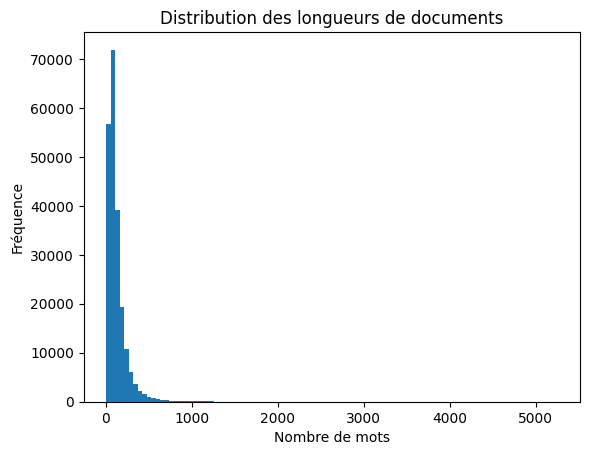

In [20]:
plt.hist(df_doc["length"], bins=100)
plt.title("Distribution des longueurs de documents")
plt.xlabel("Nombre de mots")
plt.ylabel("Fréquence")
plt.show()